In [320]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Carregamento das Bibliotecas e Dataframes**

In [321]:
# Importando as biliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import csv
# bibliotecas de processamento de dados
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import seaborn as sn
from sklearn import metrics
# bibliotecas de aprendizado de máquina
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [322]:
# mostra todos os arquivos de dados de um diretório
dataset_path = []

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Base de dados'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Base de dados/Syn01-12_5colunas.csv
/content/drive/MyDrive/Base de dados/Syn03-11_5colunas.csv


In [323]:
# Carrega o dataframe df1
df1 = pd.read_csv("/content/drive/MyDrive/Base de dados/Syn03-11_5colunas.csv")

In [324]:
# Carrega o dataframe df2
df2 = pd.read_csv("/content/drive/MyDrive/Base de dados/Syn01-12_5colunas.csv")

In [325]:
# Mostra o df1
df1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Flow Packets/s,Label
0,9429,36063894,7,2.495571e-01,Syn
1,60224,44851366,8,2.675504e-01,Syn
2,33827,1,2,2.000000e+06,Syn
3,1431,0,2,inf,Syn
4,5311,35731470,8,2.798653e-01,Syn


In [326]:
# Mostra o df1
df2.head()

,Destination Port,Flow Duration,Total Fwd Packets,Flow Packets/s,Label
0,53058,115799309,19,1.813482e-01,Syn
1,32237,113973933,16,1.403830e-01,Syn
2,9840,112,2,3.571429e+04,Syn
3,59724,105985004,16,1.509648e-01,Syn
4,32538,1,2,2.000000e+06,Syn


In [327]:
# Filtra somente as variáveis desejadas
df1 = df1[[' Destination Port', ' Flow Packets/s', ' Flow Duration', ' Total Fwd Packets', ' Label']]
df2 = df2[[' Destination Port', ' Flow Packets/s', ' Flow Duration', ' Total Fwd Packets', ' Label']]

In [328]:
# Concatena os dataframes
df3 = pd.concat([df1, df2])

In [329]:
# Mostra o df3
df3.head()

,Destination Port,Flow Packets/s,Flow Duration,Total Fwd Packets,Label
0,9429,2.495571e-01,36063894,7,Syn
1,60224,2.675504e-01,44851366,8,Syn
2,33827,2.000000e+06,1,2,Syn
3,1431,inf,0,2,Syn
4,5311,2.798653e-01,35731470,8,Syn


In [330]:
# Filtra somente as portas baixas
# df3 = df3[df3[" Destination Port"] <= 1024]
df3 = df3.loc[(df3[" Destination Port"] == 80) |
  (df3[" Destination Port"] == 443) |
  (df3[" Destination Port"] == 20) |
  (df3[" Destination Port"] == 21) |
  (df3[" Destination Port"] == 22) |
  (df3[" Destination Port"] == 25) |
  (df3[" Destination Port"] == 53) |
  (df3[" Destination Port"] == 465) |
  (df3[" Destination Port"] == 587) ]

**Análise e tratamento dos dados do dataframe**

In [331]:
# Verificando valores
df3[" Label"].value_counts()

BENIGN    27962
Syn        2476
Name:  Label, dtype: int64

In [332]:
# Exclui os dados infinitos e duplicados
df3.replace([np.inf, -np.inf], np.nan, inplace=True)
df3.dropna(inplace=True)
df3.drop_duplicates(inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [333]:
# Verificando valores
df3[" Label"].value_counts()

BENIGN    15327
Syn        1649
Name:  Label, dtype: int64

In [334]:
# Descreve os dados do dataframe
df3.describe()

,Destination Port,Flow Packets/s,Flow Duration,Total Fwd Packets
count,16976.000000,1.697600e+04,1.697600e+04,16976.000000
mean,225.420123,5.831745e+03,2.385559e+07,16.920417
std,192.611905,8.360196e+04,4.271586e+07,66.281832
min,20.000000,3.985105e-02,1.000000e+00,1.000000
25%,53.000000,1.381882e+00,2.473950e+04,2.000000
50%,80.000000,6.086937e+01,7.805800e+04,3.000000
75%,443.000000,1.779306e+02,1.432676e+07,22.000000
max,587.000000,3.000000e+06,1.199929e+08,4648.000000


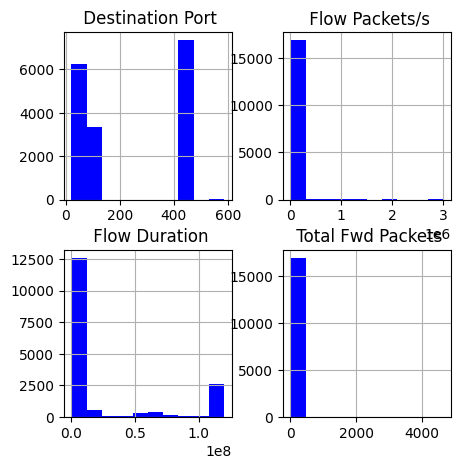

In [335]:
# cria um histograma dos dados de cada coluna
df3.hist(bins = 10, figsize=(5,5), color = 'b');

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


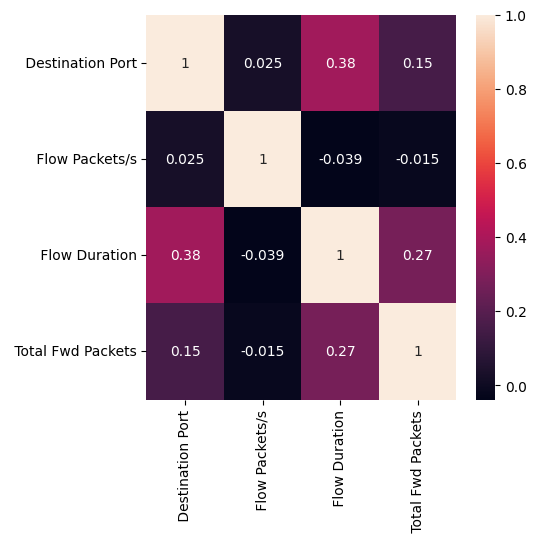

In [336]:
# Análise de correlações
# Essa função faz a correlação de todos os campos do df
correlations = df3.corr()
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(correlations, annot=True);

In [337]:
correlations

,Destination Port,Flow Packets/s,Flow Duration,Total Fwd Packets
Destination Port,1.000000,0.024897,0.375387,0.152888
Flow Packets/s,0.024897,1.000000,-0.038949,-0.015174
Flow Duration,0.375387,-0.038949,1.000000,0.274816
Total Fwd Packets,0.152888,-0.015174,0.274816,1.000000


<Axes: xlabel=' Destination Port', ylabel='count'>

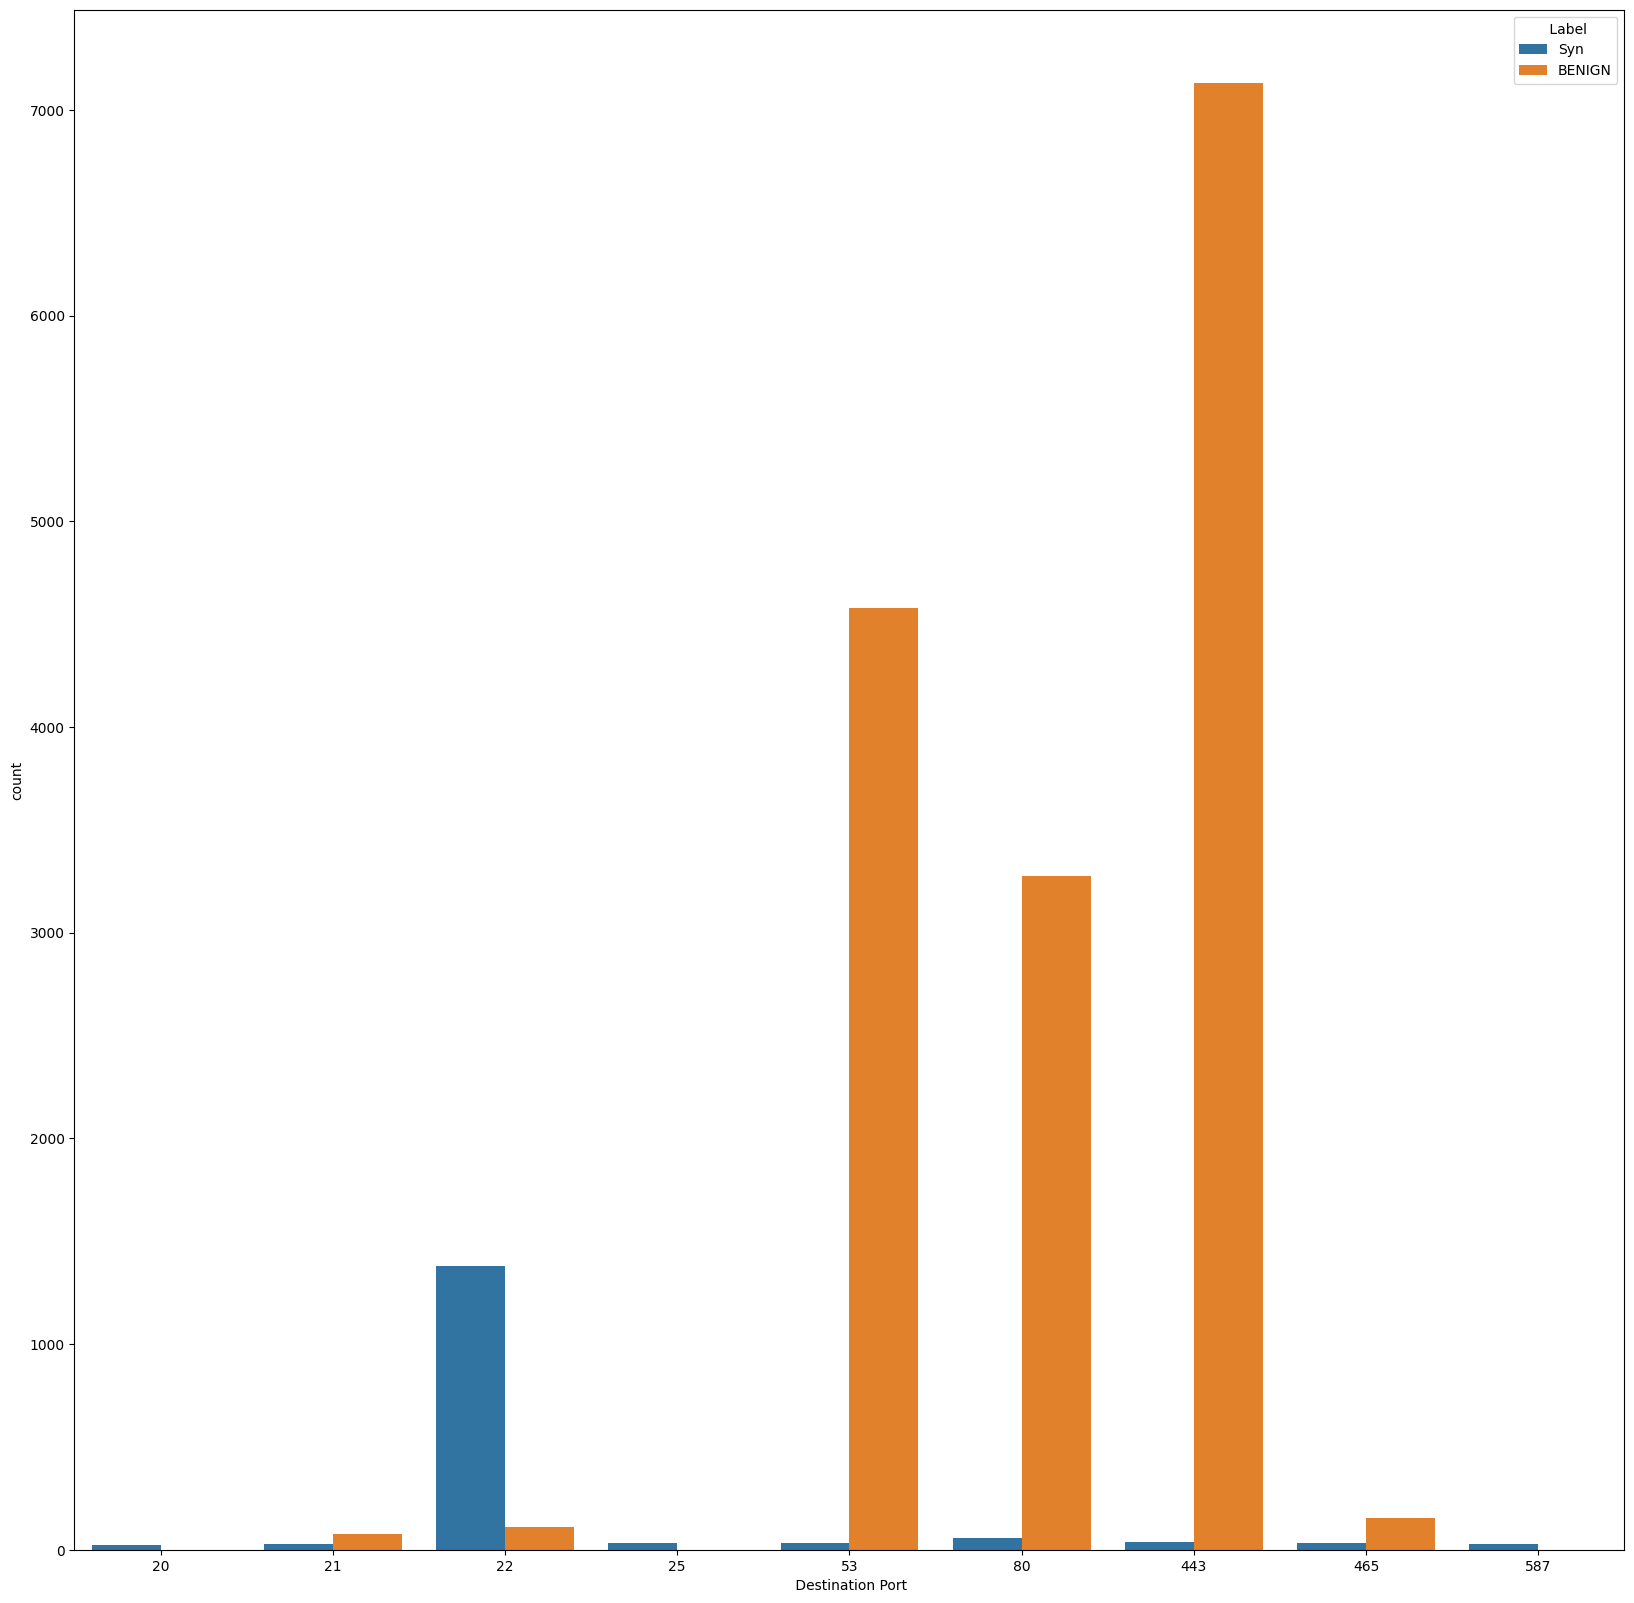

In [338]:
# Gráfico das portas usando o agrupamento com os dados de ataque
plt.figure(figsize=[20,20])
sns.countplot(x = ' Destination Port', hue = ' Label', data=df3)

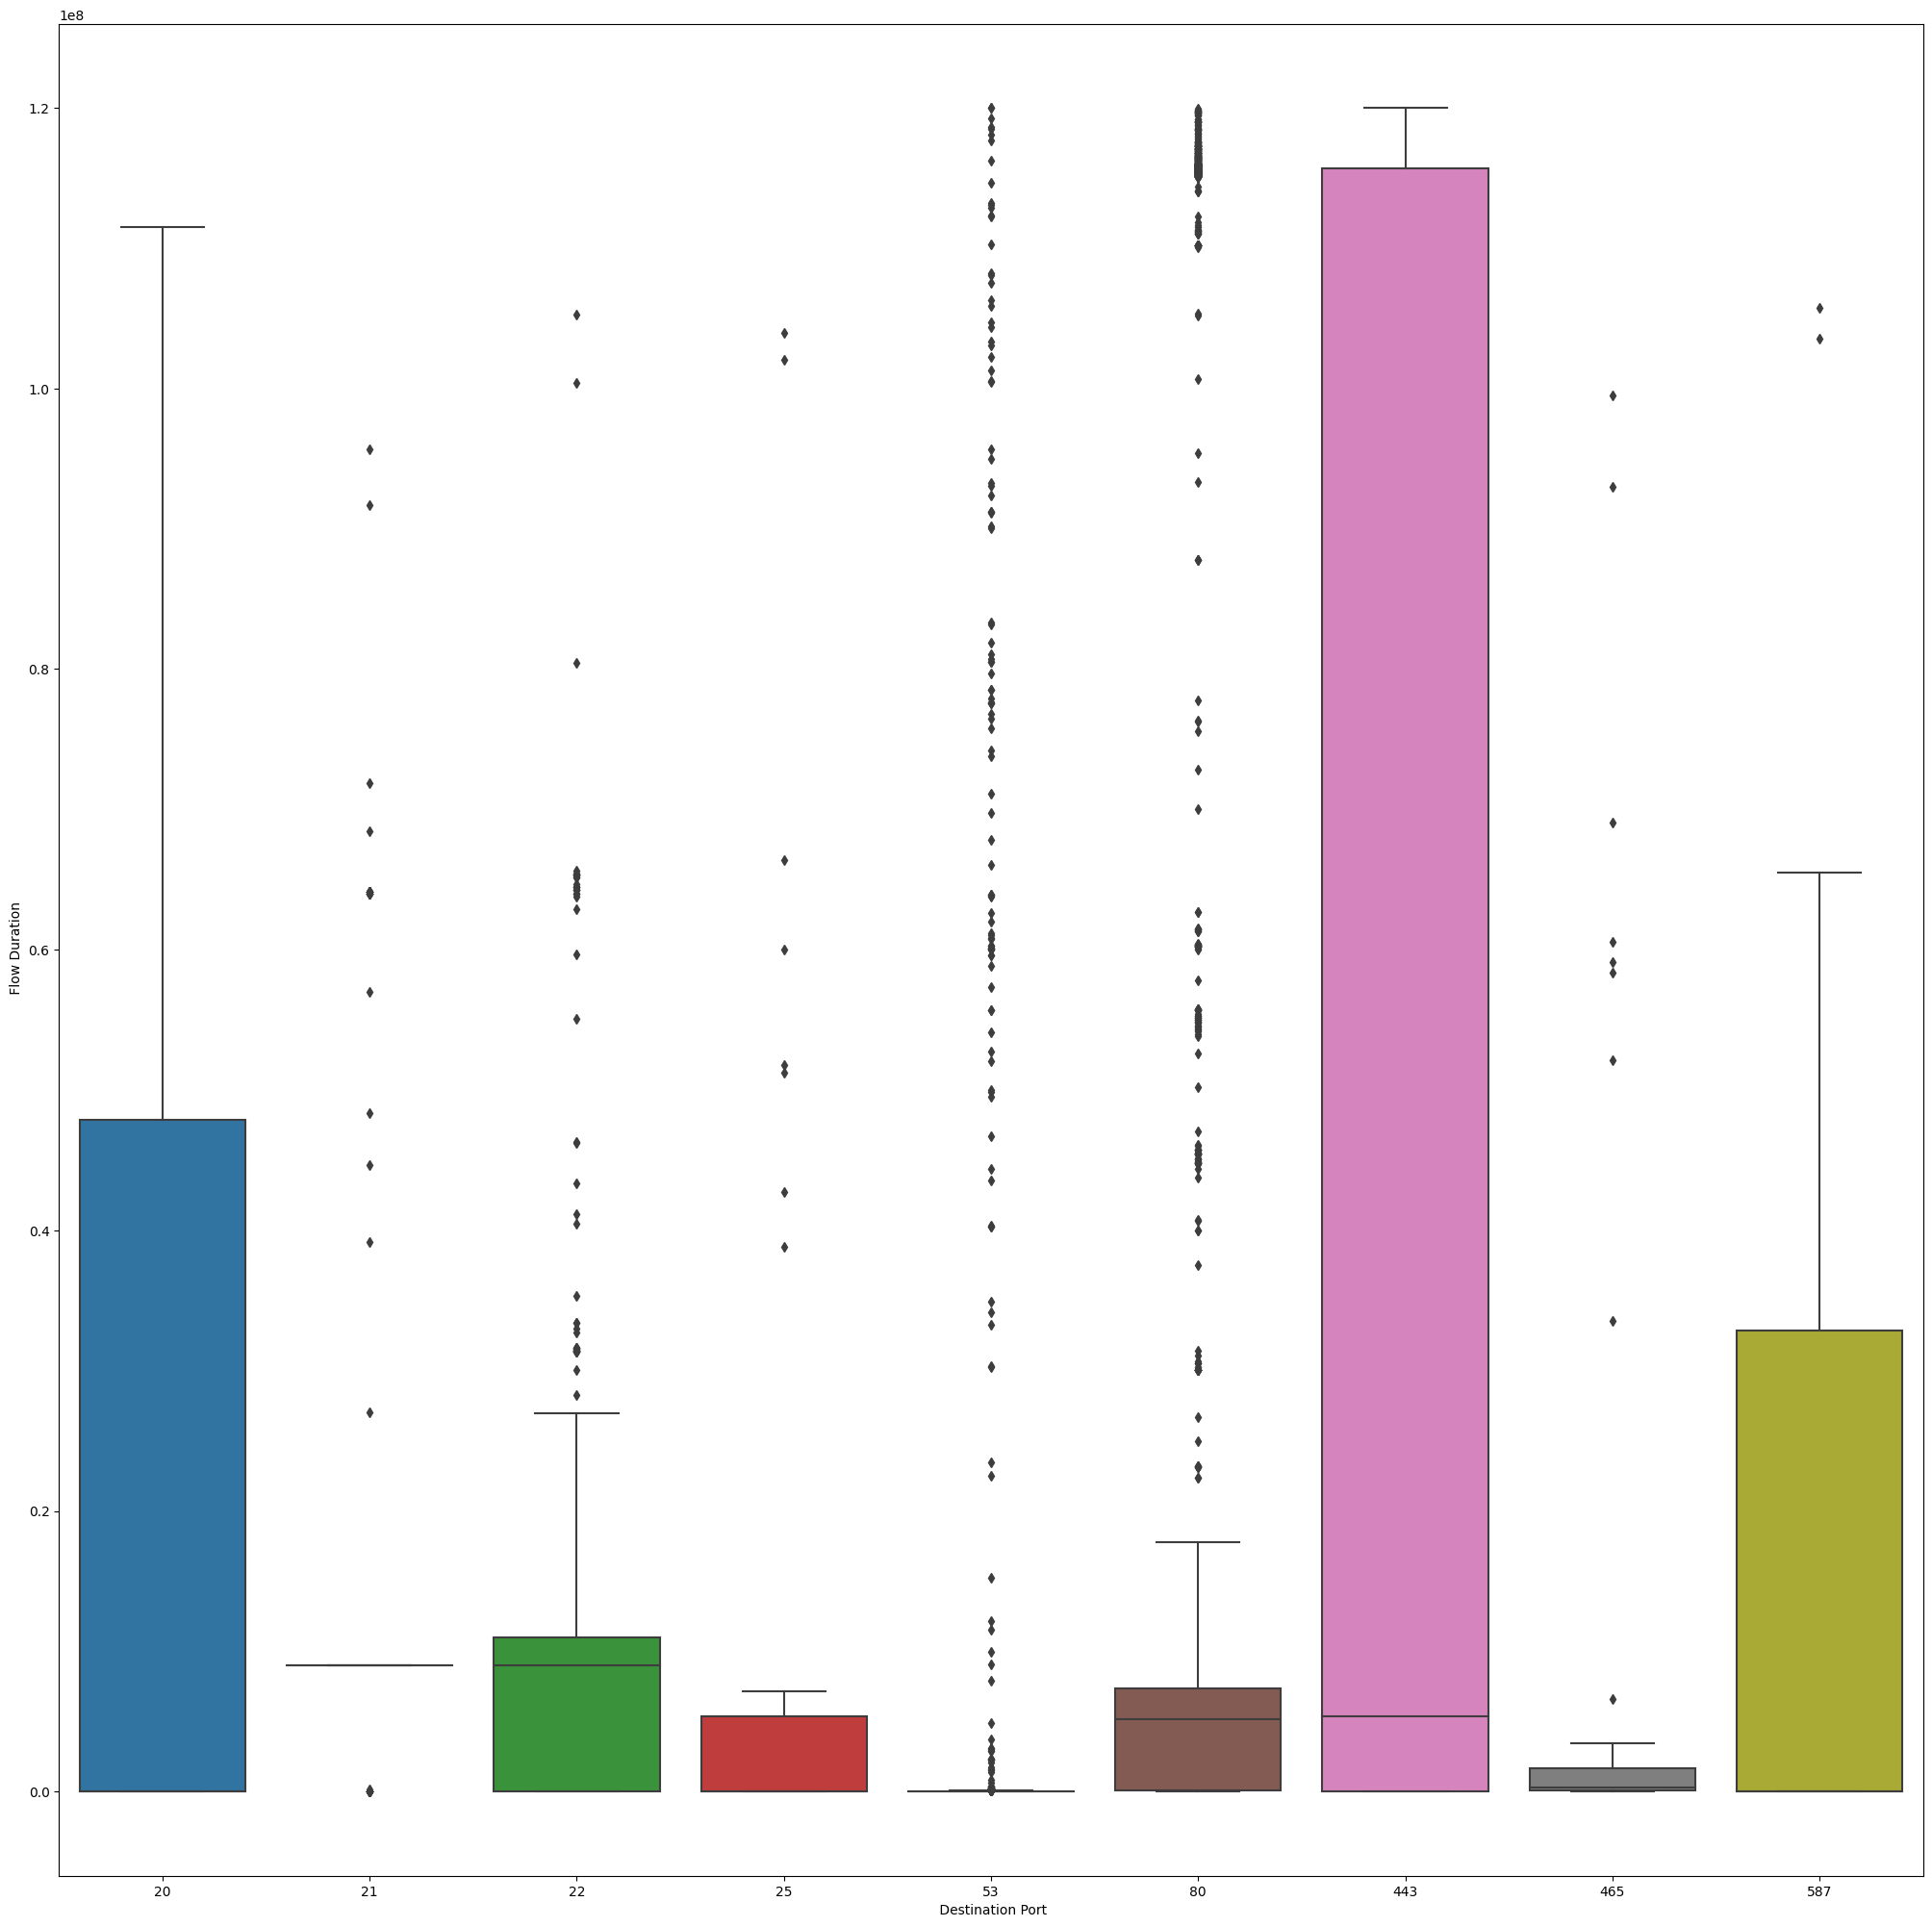

In [339]:
# Boxplot porta x Flow Duration
plt.figure(figsize=[25,25])
sns.boxplot(x = ' Destination Port', y = ' Flow Duration', data=df3);

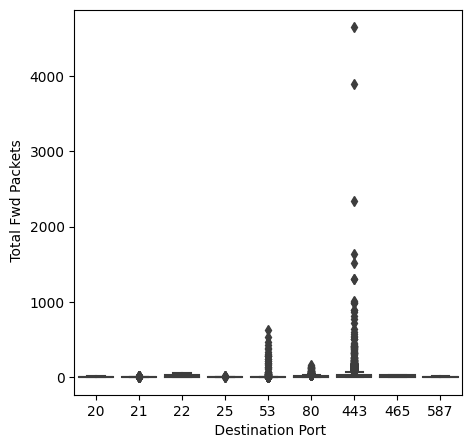

In [340]:
# Boxplot porta x Flow Duration
plt.figure(figsize=[5,5])
sns.boxplot(x = ' Destination Port', y = ' Total Fwd Packets', data=df3);

**Pré processamento dos dataframes**

In [341]:
# Separando dos dados categoricos dos contínuos
df_cat =  df3[[' Destination Port']]

In [342]:
# Transformação de dados categóricos em números para processamento nas funções
# Exemplo de criação de dummy variables

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
df_cat = onehotencoder.fit_transform(df_cat).toarray()
df_cat.shape

(16976, 9)

In [343]:
# Depois da transformação é necessário transformar o df_cat em um objeto do pandas novamente
df_cat = pd.DataFrame(df_cat)
df_cat

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
16971,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16972,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16973,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16974,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [344]:
# Separa os dados numéricos
df_cont = df3[[' Flow Packets/s', ' Flow Duration', ' Total Fwd Packets']]
df_cont

,Flow Packets/s,Flow Duration,Total Fwd Packets
1291,0.509937,31376453,4
9326,40816.326531,49,2
14272,0.206148,38807050,8
17596,25157.232704,159,2
26862,0.300611,33265536,6
...,...,...,...
1478983,141.008919,28367,1
1501612,5115.089514,782,1
1502473,87.062511,45944,2
1544137,3.880933,5411070,12


In [345]:
# Juntando os dados categóricos com os dados numéricos
# df_all = pd.concat([df_cat, df_cont], axis = 1)
df_cat = df_cat.reset_index(drop=True)
df_cont = df_cont.reset_index(drop=True)
df_all = pd.concat([df_cat, df_cont], axis = 1)
df_all

,0,1,2,3,4,5,6,7,8,Flow Packets/s,Flow Duration,Total Fwd Packets
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.509937,31376453,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40816.326531,49,2
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.206148,38807050,8
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25157.232704,159,2
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.300611,33265536,6
...,...,...,...,...,...,...,...,...,...,...,...,...
16971,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,141.008919,28367,1
16972,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5115.089514,782,1
16973,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,87.062511,45944,2
16974,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.880933,5411070,12


In [346]:
df_all.head()

,0,1,2,3,4,5,6,7,8,Flow Packets/s,Flow Duration,Total Fwd Packets
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.509937,31376453,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40816.326531,49,2
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.206148,38807050,8
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25157.232704,159,2
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.300611,33265536,6


In [347]:
# Transformando todos os nomes de coluna em strings para a identificação no Min Max scaler
df_all.columns = df_all.columns.astype(str)

In [348]:
# Normalização dos Dados

# Os dados estão com valores altos e baixos
# para o algoritmo não priorizar valores muito altos
# essa normalização é importante para cálculos

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_all = scaler.fit_transform(df_all)
# df_all

In [349]:
y = df3[' Label']
y

1291          Syn
9326          Syn
14272         Syn
17596         Syn
26862         Syn
            ...  
1478983    BENIGN
1501612       Syn
1502473    BENIGN
1544137       Syn
1579155       Syn
Name:  Label, Length: 16976, dtype: object

In [350]:
y.value_counts()

BENIGN    15327
Syn        1649
Name:  Label, dtype: int64

In [351]:
# Transformação de dados LABEL em números para processamento nas funções
# Exemplo de criação de dummy variables
# cria uma label (category) como encoder object
le = LabelEncoder()
y =  le.fit_transform(y)
y

array([1, 1, 1, ..., 0, 1, 1])

In [352]:
# assume que ' Label' é a variável alvo
x = df_all

# cria os dataframes de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [353]:
# ajusta as amostras para o treinamento
sampling_strategy_under = {
    0: 1649
}

sampling_strategy_over = {
    1: 1649
}

In [354]:
over = SMOTE(sampling_strategy=sampling_strategy_over)
under = RandomUnderSampler(sampling_strategy=sampling_strategy_under)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)

**Modelos de Aprendizado de Máquina**

Random Forest

In [355]:
# Aplica o RandomForest nos dados sem o ajuste
Random_forest = RandomForestClassifier()
Random_forest.fit(X_train, y_train)

yPred = Random_forest.predict(X_test)

In [356]:
print(classification_report(y_test, yPred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3066
           1       0.98      0.97      0.97       330

    accuracy                           0.99      3396
   macro avg       0.99      0.98      0.99      3396
weighted avg       0.99      0.99      0.99      3396



<Axes: xlabel='Predicted', ylabel='Actual'>

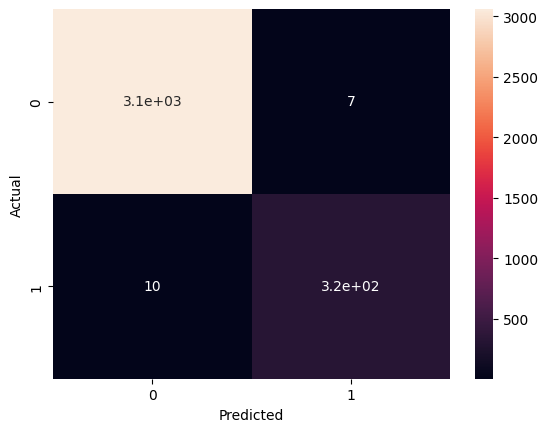

In [357]:
confusion_matrix = pd.crosstab(y_test, yPred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [358]:
print('Accuracy: ',metrics.accuracy_score(y_test, yPred))
plt.show()

Accuracy:  0.9949941107184923


In [359]:
# Aplica o RandomForest nos dados com o ajuste
Random_forest = RandomForestClassifier(n_estimators=120, min_samples_leaf=200)
Random_forest.fit(X_train_res, y_train_res)

yPred = Random_forest.predict(X_test)

In [360]:
print(classification_report(y_test, yPred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3066
           1       0.88      0.93      0.91       330

    accuracy                           0.98      3396
   macro avg       0.94      0.96      0.95      3396
weighted avg       0.98      0.98      0.98      3396



<Axes: xlabel='Predicted', ylabel='Actual'>

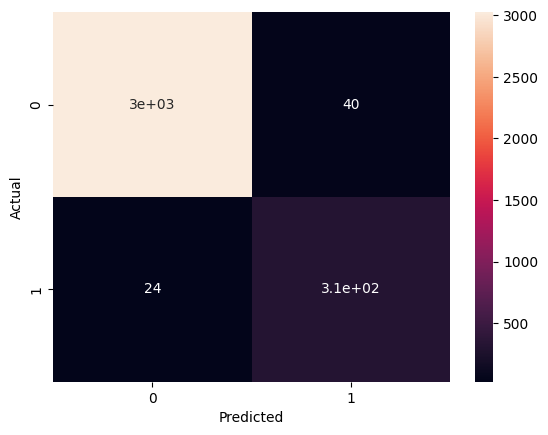

In [361]:
confusion_matrix = pd.crosstab(y_test, yPred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [362]:
print('Accuracy: ',metrics.accuracy_score(y_test, yPred))
plt.show()

Accuracy:  0.9811542991755006


**Interpretando os resultados random forest**

In [363]:
# instalando shap⁹
!pip install shap
import shap
shap.initjs()

In [364]:
# @title Interpretando os resultados random forest

In [365]:
# configurando o shap explainer
explainer = shap.Explainer(Random_forest)
shap_values = explainer.shap_values(X_test)

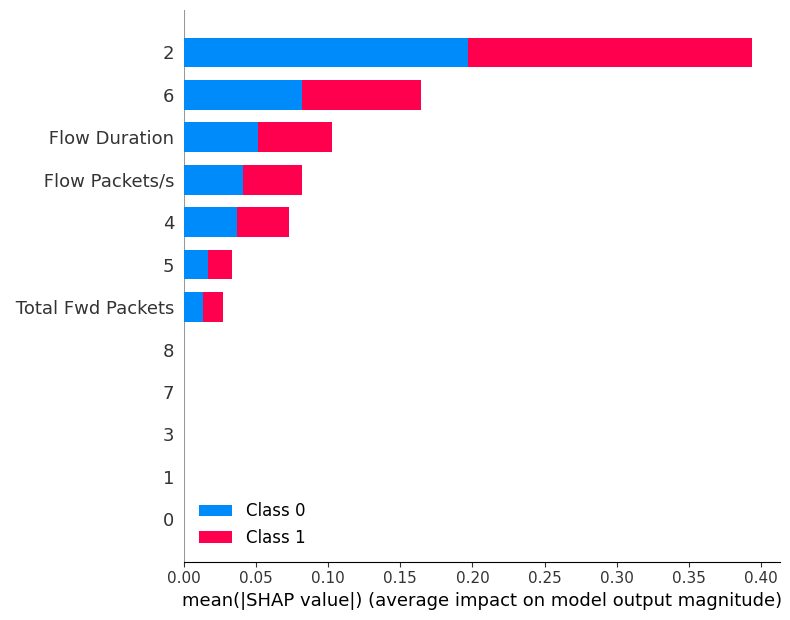

In [366]:
# mostra o summary_plot (a importância de cada variável para o modelo)
shap.summary_plot(shap_values, X_test)

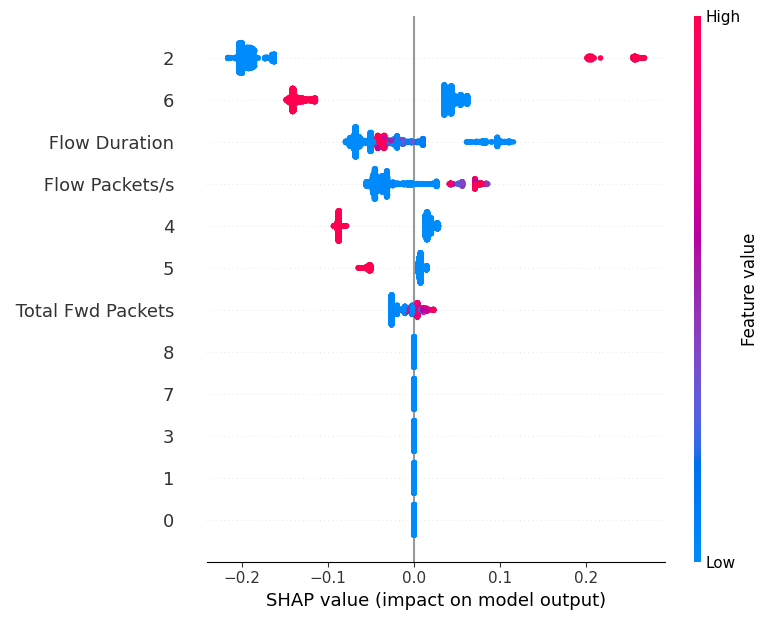

In [367]:
shap.summary_plot(shap_values[1], X_test)

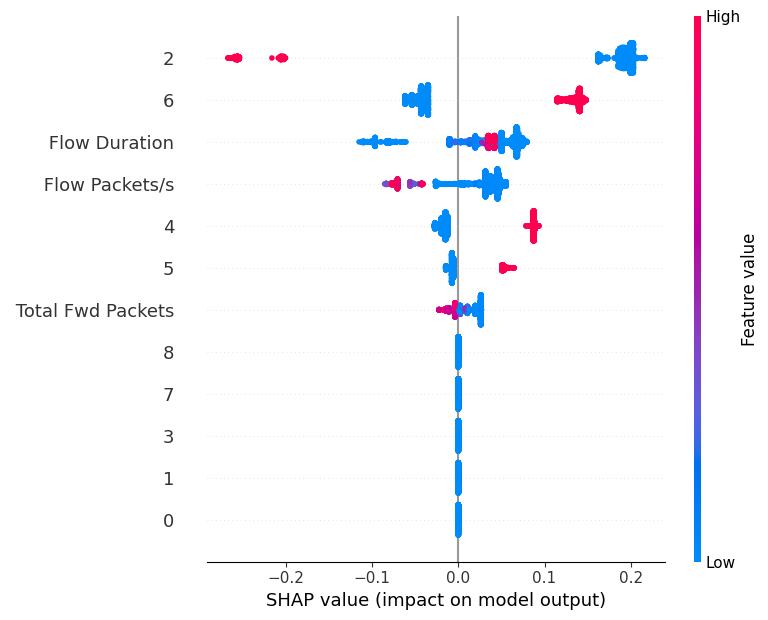

In [368]:
shap.summary_plot(shap_values[0], X_test)

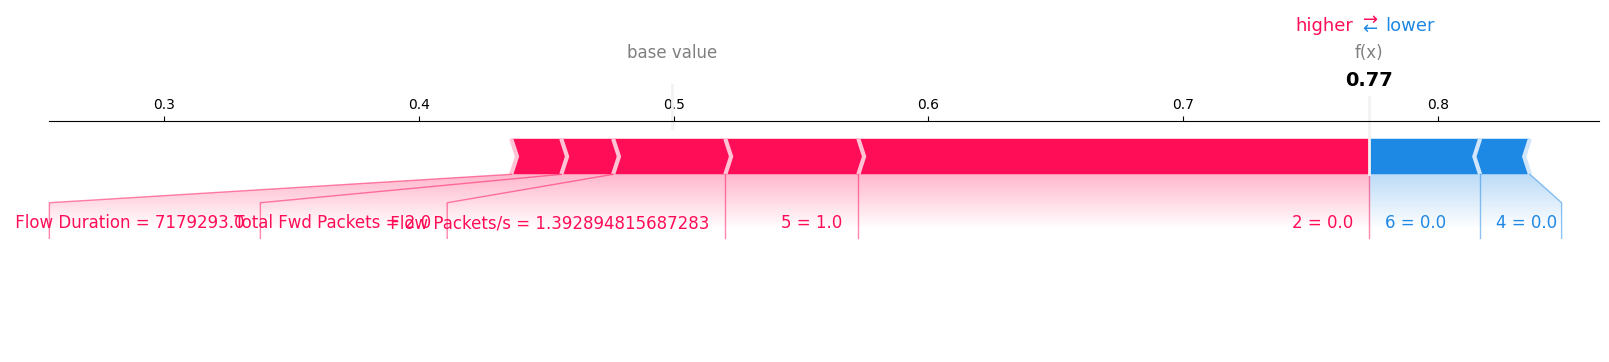

In [369]:
# force plot label 0
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

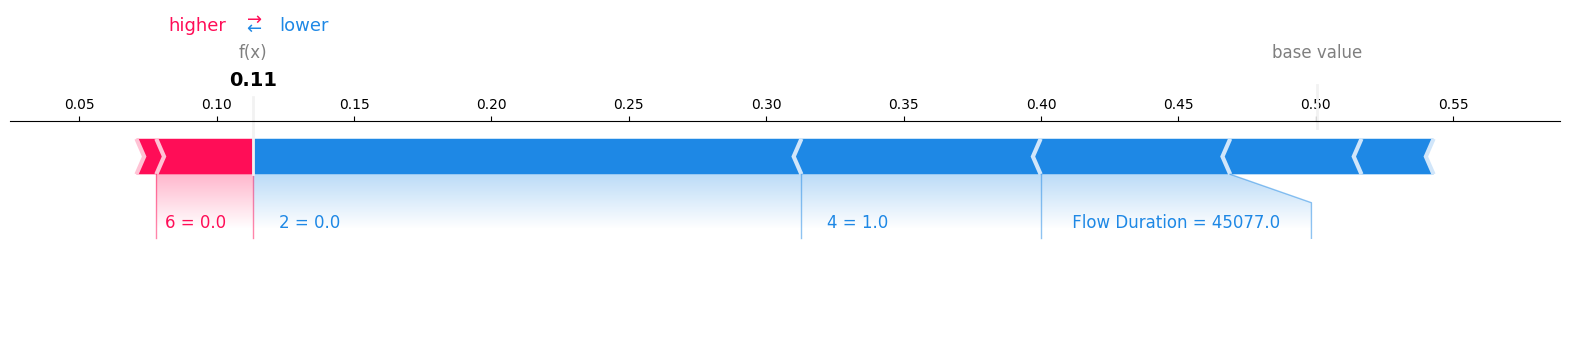

In [370]:
# force plot label 1
shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)

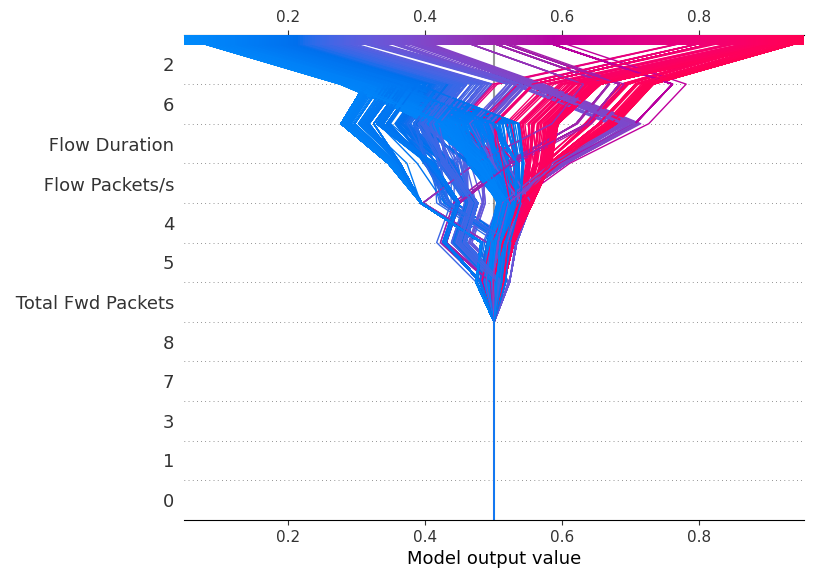

In [371]:
# decision plot label 1
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns, ignore_warnings=True)

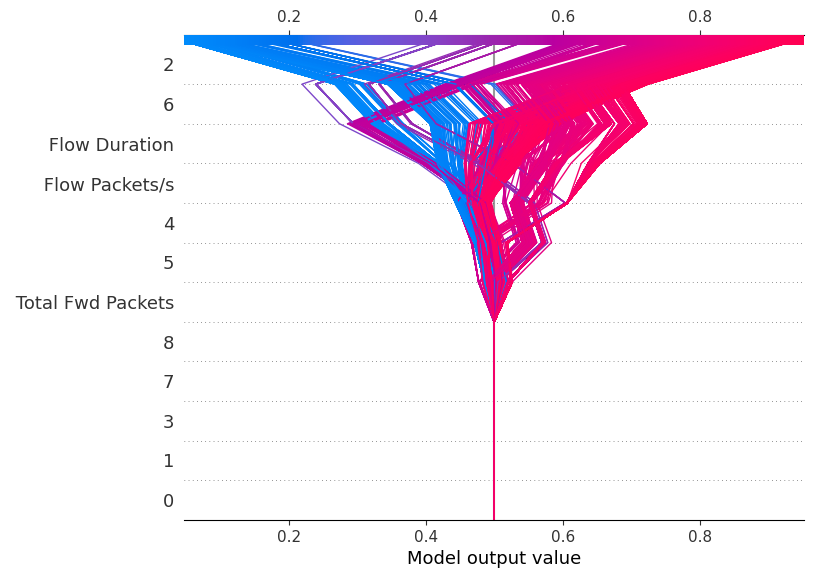

In [372]:
# decision plot label 0
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns, ignore_warnings=True)